In [1]:
#!/usr/bin/env python
import io
import os
import glob
import gzip
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import numpy as np

In [19]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("mutation_counts_metadata_ds6.csv")
df

,Run,unc_mut,chr11_mut,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,cell_type,Center Name,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,disease,Experiment,GEO_Accession (exp),Instrument,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,Average_Depth_UNC,Coverage_>2,Coverage_>4,Coverage_>8,Coverage_>10,Coverage_>2_chr11,Coverage_>4_chr11,Coverage_>8_chr11,Coverage_>10_chr11
0,SRR8181361,28,28617,RNA-Seq,302,13186016110,PRJNA505280,SAMN10414135,8418114761,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001355,GSM3466771,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:06:00Z,1,GSM3466771,Peripheral blood mononuclear cells (PBMCs),SRP168421,77.124757,9559,8512,7441,7197,10758008,7835440,5325665,4657344
1,SRR8181373,35,26123,RNA-Seq,272,7376219522,PRJNA505280,SAMN10414123,3425180528,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001367,GSM3466783,NextSeq 500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T10:58:00Z,1,GSM3466783,Peripheral blood mononuclear cells (PBMCs),SRP168421,34.015487,7811,6942,5920,5385,6284906,4633597,3207608,2832910
2,SRR8181370,32,27040,RNA-Seq,302,12684968514,PRJNA505280,SAMN10414126,8088992383,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001364,GSM3466780,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:02:00Z,1,GSM3466780,Peripheral blood mononuclear cells (PBMCs),SRP168421,150.525463,10956,9579,7969,7628,10694181,7724651,5262163,4617287
3,SRR8181359,49,30978,RNA-Seq,302,12034193546,PRJNA505280,SAMN10414137,7485804280,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001353,GSM3466769,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:06:00Z,1,GSM3466769,Peripheral blood mononuclear cells (PBMCs),SRP168421,140.505006,13192,11861,9128,8350,13079468,9356485,6187083,5370166
4,SRR8181368,33,23494,RNA-Seq,302,11156326658,PRJNA505280,SAMN10414128,6790115228,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001362,GSM3466778,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T10:59:00Z,1,GSM3466778,Peripheral blood mononuclear cells (PBMCs),SRP168421,103.411366,11046,10077,8044,7638,9046808,6546687,4487726,3948993
5,SRR8181357,42,27683,RNA-Seq,302,13106947074,PRJNA505280,SAMN10414139,8156799663,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001351,GSM3466767,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:03:00Z,1,GSM3466767,Peripheral blood mononuclear cells (PBMCs),SRP168421,95.930563,10159,8841,7745,7462,10267367,7534325,5208380,4579758
6,SRR8181362,45,29995,RNA-Seq,302,13337457332,PRJNA505280,SAMN10414134,8310726004,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001356,GSM3466772,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:07:00Z,1,GSM3466772,Peripheral blood mononuclear cells (PBMCs),SRP168421,160.905136,12397,11704,8718,7881,11333831,8026005,5394904,4714230
7,SRR8181371,70,29490,RNA-Seq,3

In [20]:
#somalier ancestry
somalier = pd.read_csv("/work/project/ext_016/RNA-Seq-Variant-Calling_1/source_dir_6/somalier-ancestry.somalier-ancestry.tsv", delimiter='\t')
# Remove '_Aligned' from the '#sample_id' column
somalier['#sample_id'] = somalier['#sample_id'].str.replace('_Aligned', '', regex=False)
somalier = somalier.rename(columns={'#sample_id': 'Run'})
# Merge df with somalier to add the "predicted_ancestry" column based on "Run"
df = df.merge(somalier[['Run', 'predicted_ancestry']], on='Run', how='left')

df

,Run,unc_mut,chr11_mut,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,cell_type,Center Name,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,disease,Experiment,GEO_Accession (exp),Instrument,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,Average_Depth_UNC,Coverage_>2,Coverage_>4,Coverage_>8,Coverage_>10,Coverage_>2_chr11,Coverage_>4_chr11,Coverage_>8_chr11,Coverage_>10_chr11,predicted_ancestry
0,SRR8181361,28,28617,RNA-Seq,302,13186016110,PRJNA505280,SAMN10414135,8418114761,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001355,GSM3466771,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:06:00Z,1,GSM3466771,Peripheral blood mononuclear cells (PBMCs),SRP168421,77.124757,9559,8512,7441,7197,10758008,7835440,5325665,4657344,AFR
1,SRR8181373,35,26123,RNA-Seq,272,7376219522,PRJNA505280,SAMN10414123,3425180528,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001367,GSM3466783,NextSeq 500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T10:58:00Z,1,GSM3466783,Peripheral blood mononuclear cells (PBMCs),SRP168421,34.015487,7811,6942,5920,5385,6284906,4633597,3207608,2832910,AFR
2,SRR8181370,32,27040,RNA-Seq,302,12684968514,PRJNA505280,SAMN10414126,8088992383,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001364,GSM3466780,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:02:00Z,1,GSM3466780,Peripheral blood mononuclear cells (PBMCs),SRP168421,150.525463,10956,9579,7969,7628,10694181,7724651,5262163,4617287,AFR
3,SRR8181359,49,30978,RNA-Seq,302,12034193546,PRJNA505280,SAMN10414137,7485804280,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001353,GSM3466769,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:06:00Z,1,GSM3466769,Peripheral blood mononuclear cells (PBMCs),SRP168421,140.505006,13192,11861,9128,8350,13079468,9356485,6187083,5370166,AMR
4,SRR8181368,33,23494,RNA-Seq,302,11156326658,PRJNA505280,SAMN10414128,6790115228,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001362,GSM3466778,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T10:59:00Z,1,GSM3466778,Peripheral blood mononuclear cells (PBMCs),SRP168421,103.411366,11046,10077,8044,7638,9046808,6546687,4487726,3948993,AMR
5,SRR8181357,42,27683,RNA-Seq,302,13106947074,PRJNA505280,SAMN10414139,8156799663,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001351,GSM3466767,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:03:00Z,1,GSM3466767,Peripheral blood mononuclear cells (PBMCs),SRP168421,95.930563,10159,8841,7745,7462,10267367,7534325,5208380,4579758,AFR
6,SRR8181362,45,29995,RNA-Seq,302,13337457332,PRJNA505280,SAMN10414134,8310726004,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",systemic lupus erythematosus,SRX5001356,GSM3466772,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:07:00Z,1,GSM3466772,Peripheral blood mononuclear cells (PBMCs),SRP168421,160.905136,12397,11704,8718,7881,11333831,8026005,5394

In [21]:
# new old normalization method

df["unc_rate_>4"] = df["unc_mut"]/df["Coverage_>4"]
df["ch11_rate"] = df["chr11_mut"]/df["Coverage_>4_chr11"]
# unc_mut/coverage>2, unc_mut/coverage>4, unc_mut/coverage>8, unc_mut/coverage>10
df["unc_rate_>2"] = df["unc_mut"]/df["Coverage_>2"]
df["unc_rate_>8"] = df["unc_mut"]/df["Coverage_>8"]
df["unc_rate_>10"] = df["unc_mut"]/df["Coverage_>10"]


x_data = df[["unc_rate_>2", "unc_rate_>4", "unc_rate_>8", "unc_rate_>10"]]
x_data


,unc_rate_>2,unc_rate_>4,unc_rate_>8,unc_rate_>10
0,0.002929,0.003289,0.003763,0.003891
1,0.004481,0.005042,0.005912,0.006500
2,0.002921,0.003341,0.004016,0.004195
3,0.003714,0.004131,0.005368,0.005868
4,0.002988,0.003275,0.004102,0.004321
5,0.004134,0.004751,0.005423,0.005629
6,0.003630,0.003845,0.005162,0.005710
7,0.005745,0.006277,0.007500,0.008300
8,0.004290,0.004998,0.006169,0.006400
9,0.004230,0.005314,0.006356,0.006526


In [22]:
# Replace the full name with just the abbreviation
df.loc[df["disease"] == "systemic lupus erythematosus", "disease"] = "SLE"
df.loc[df["disease"] == "healthy", "disease"] = "Healthy"
df

,Run,unc_mut,chr11_mut,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,cell_type,Center Name,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,disease,Experiment,GEO_Accession (exp),Instrument,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,Average_Depth_UNC,Coverage_>2,Coverage_>4,Coverage_>8,Coverage_>10,Coverage_>2_chr11,Coverage_>4_chr11,Coverage_>8_chr11,Coverage_>10_chr11,predicted_ancestry,unc_rate_>4,ch11_rate,unc_rate_>2,unc_rate_>8,unc_rate_>10
0,SRR8181361,28,28617,RNA-Seq,302,13186016110,PRJNA505280,SAMN10414135,8418114761,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SLE,SRX5001355,GSM3466771,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:06:00Z,1,GSM3466771,Peripheral blood mononuclear cells (PBMCs),SRP168421,77.124757,9559,8512,7441,7197,10758008,7835440,5325665,4657344,AFR,0.003289,0.003652,0.002929,0.003763,0.003891
1,SRR8181373,35,26123,RNA-Seq,272,7376219522,PRJNA505280,SAMN10414123,3425180528,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SLE,SRX5001367,GSM3466783,NextSeq 500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T10:58:00Z,1,GSM3466783,Peripheral blood mononuclear cells (PBMCs),SRP168421,34.015487,7811,6942,5920,5385,6284906,4633597,3207608,2832910,AFR,0.005042,0.005638,0.004481,0.005912,0.006500
2,SRR8181370,32,27040,RNA-Seq,302,12684968514,PRJNA505280,SAMN10414126,8088992383,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SLE,SRX5001364,GSM3466780,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:02:00Z,1,GSM3466780,Peripheral blood mononuclear cells (PBMCs),SRP168421,150.525463,10956,9579,7969,7628,10694181,7724651,5262163,4617287,AFR,0.003341,0.003500,0.002921,0.004016,0.004195
3,SRR8181359,49,30978,RNA-Seq,302,12034193546,PRJNA505280,SAMN10414137,7485804280,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SLE,SRX5001353,GSM3466769,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:06:00Z,1,GSM3466769,Peripheral blood mononuclear cells (PBMCs),SRP168421,140.505006,13192,11861,9128,8350,13079468,9356485,6187083,5370166,AMR,0.004131,0.003311,0.003714,0.005368,0.005868
4,SRR8181368,33,23494,RNA-Seq,302,11156326658,PRJNA505280,SAMN10414128,6790115228,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SLE,SRX5001362,GSM3466778,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T10:59:00Z,1,GSM3466778,Peripheral blood mononuclear cells (PBMCs),SRP168421,103.411366,11046,10077,8044,7638,9046808,6546687,4487726,3948993,AMR,0.003275,0.003589,0.002988,0.004102,0.004321
5,SRR8181357,42,27683,RNA-Seq,302,13106947074,PRJNA505280,SAMN10414139,8156799663,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SLE,SRX5001351,GSM3466767,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-15T00:00:00Z,2018-11-13T11:03:00Z,1,GSM3466767,Peripheral blood mononuclear cells (PBMCs),SRP168421,95.930563,10159,8841,7745,7462,10267367,7534325,5208380,4579758,AFR,0.004751,0.003674,0.004134,0.005423,0.005629
6,SRR8181362,45,29995,RNA-Seq,302,13337457332,PRJNA505280,SAMN10414134,8310726004,Peripheral blood mononuclear cells (PBMCs),GEO,public,"fastq,run.zq,sra","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",SLE,SRX5001356,GSM3466772,Illumina HiSeq 2500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-11-

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load coverage data
def load_coverage_data(coverage_file):
    df = pd.read_csv(coverage_file, sep='\t', header=None)
    df.columns = ['chromosome', 'position', 'coverage']
    return df

# Load variant data from a CSV file
def load_variants_from_csv(csv_file):
    """
    Load variant data from a CSV file.
    
    Parameters:
    -----------
    csv_file : str
        Path to the CSV file containing variant data
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame containing variant information
    """
    # Read the CSV file
    variants_df = pd.read_csv(csv_file)
    
    # Check if required columns exist (adjust column names if needed)
    required_columns = ['chromosome', 'position']
    for col in required_columns:
        if col not in variants_df.columns:
            # Try to find alternative column names
            if col == 'chromosome' and any(c in variants_df.columns for c in ['CHROM', 'chr', 'Chr']):
                for alt_name in ['CHROM', 'chr', 'Chr']:
                    if alt_name in variants_df.columns:
                        variants_df['chromosome'] = variants_df[alt_name]
                        break
            elif col == 'position' and any(c in variants_df.columns for c in ['POS', 'pos', 'Position']):
                for alt_name in ['POS', 'pos', 'Position']:
                    if alt_name in variants_df.columns:
                        variants_df['position'] = variants_df[alt_name]
                        break
            else:
                raise ValueError(f"Required column '{col}' not found in the CSV file")
    
    # Ensure position is treated as an integer
    variants_df['position'] = variants_df['position'].astype(int)
    
    # If chromosome format is inconsistent, standardize it
    if 'chromosome' in variants_df.columns and not variants_df['chromosome'].iloc[0].startswith('chr'):
        variants_df['chromosome'] = 'chr' + variants_df['chromosome'].astype(str)
    
    return variants_df

# Calculate mutation frequency at different coverage thresholds
def calculate_mutation_rates_by_threshold(coverage_df, variants_df, thresholds=[2, 4, 8, 10, 15, 20, 30]):
    results = []
    
    # Filter variants to match chromosome in coverage data (if needed)
    chromosome = coverage_df['chromosome'].iloc[0]
    variants_df = variants_df[variants_df['chromosome'] == chromosome]
    
    # Create a set of positions with variants for faster lookups
    variant_positions = set(variants_df['position'])
    
    for threshold in thresholds:
        # Get positions meeting the threshold
        covered_positions = coverage_df[coverage_df['coverage'] >= threshold]['position']
        
        # Count variants at those positions
        variants_at_threshold = sum(1 for pos in covered_positions if pos in variant_positions)
        
        # Calculate mutation rate
        bases_above_threshold = len(covered_positions)
        mutation_rate = variants_at_threshold / bases_above_threshold if bases_above_threshold > 0 else 0
        
        results.append({
            'threshold': threshold,
            'bases_covered': bases_above_threshold,
            'variants_detected': variants_at_threshold,
            'mutation_rate': mutation_rate
        })
    
    return pd.DataFrame(results)

# Plot the results
def plot_mutation_rates(results_df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Mutation Rate vs Coverage Threshold
    ax1.plot(results_df['threshold'], results_df['mutation_rate'], 'o-', linewidth=2)
    ax1.set_xlabel('Coverage Threshold')
    ax1.set_ylabel('Mutation Rate (variants/base)')
    ax1.set_title('Mutation Rate vs Coverage Threshold')
    ax1.grid(True)
    
    # Plot 2: Number of Bases & Variants at Each Threshold
    ax2.set_xlabel('Coverage Threshold')
    ax2.set_ylabel('Count')
    ax2.set_title('Bases and Variants vs Coverage Threshold')
    
    # Plot number of bases (primary y-axis)
    ax2.plot(results_df['threshold'], results_df['bases_covered'], 'b-o', label='Bases above threshold')
    
    # Create secondary y-axis for variants
    ax3 = ax2.twinx()
    ax3.plot(results_df['threshold'], results_df['variants_detected'], 'r-o', label='Variants detected')
    ax3.set_ylabel('Variants Detected', color='r')
    
    # Add legends
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax3.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    plt.tight_layout()
    return fig

# Extract quality metrics for variants at different coverage thresholds
def analyze_variant_quality_by_coverage(csv_file, coverage_file):
    
    # Load coverage data
    coverage_df = pd.read_csv(coverage_file, sep='\t', header=None)
    coverage_df.columns = ['CHROM', 'POS', 'coverage']
    
    # Group positions by coverage
    coverage_groups = {
        "2x": set(coverage_df[coverage_df['coverage'] == 2]['POS']),
        "3x": set(coverage_df[coverage_df['coverage'] == 3]['POS']),
        "4x": set(coverage_df[coverage_df['coverage'] == 4]['POS']),
        "6x": set(coverage_df[coverage_df['coverage'] == 6]['POS']),
        "8x": set(coverage_df[coverage_df['coverage'] >= 8]['POS'])
    }
    
    # Load the variant CSV file
    variant_df = pd.read_csv(csv_file)
    
    # Initialize dictionary to store variants by coverage
    variants_by_cov = {k: [] for k in coverage_groups.keys()}
    
    # Process each variant in the CSV
    for index, row in variant_df.iterrows():
        pos = int(row['POS'])
        qual = float(row['QUAL'])
        
        # Assign to coverage group
        for cov_group, positions in coverage_groups.items():
            if pos in positions:
                variants_by_cov[cov_group].append({
                    'POS': pos,
                    'QUAL': qual,
                    # You can add more metrics from your CSV columns here
                    # 'depth': row['DP'],
                    # 'qual_depth': row['QD'],
                    # 'strand_bias': row['FS'],
                })
    
    # Calculate summary statistics for each coverage group
    quality_stats = {}
    for cov_group, variants in variants_by_cov.items():
        if variants:
            qualities = [v['QUAL'] for v in variants]
            quality_stats[cov_group] = {
                'mean_quality': np.mean(qualities),
                'median_quality': np.median(qualities),
                'std_quality': np.std(qualities),
                'variant_count': len(variants)
            }
    
    return quality_stats
# Function to process samples with a given sample ID
def process_sample(sample_id):
    # Define file paths with the sample ID
    coverage_file = f'/work/project/ext_016/RNA-Seq-Variant-Calling_1/source_dir_6/pass2/{sample_id}_Aligned.sortedByCoord.out_UNC_coverage.txt'
    csv_file = f'/work/project/ext_016/RNA-Seq-Variant-Calling_1/source_dir_6/filtered/csv_files/{sample_id}.csv'
    
    # Load data
    coverage_df = load_coverage_data(coverage_file)
    variants_df = load_variants_from_csv(csv_file)
    
    
    # Calculate mutation rates at different thresholds ......... CHANGE THIS TO PLOT QUALITY
    thresholds = [2, 4, 6, 8, 10]
    #thresholds = [2, 4, 6, 8, 10, 15, 20, 30, 40, 50]
    #results = calculate_mutation_rates_by_threshold(coverage_df, variants_df, thresholds)
    results = analyze_variant_quality_by_coverage(csv_file, coverage_file)
    

    
    return results

# Example usage - replace with your actual sample IDs
sample_ids = df["Run"]  # Add more IDs as needed, e.g. ["6870283", "6870284", "6870285"]

all_results = {}
for sample_id in sample_ids:
    all_results[sample_id] = process_sample(sample_id)



/tmp/ipykernel_49712/2295141893.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.002646002646002646' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  avg_df.loc[i, 'mutation_rate'] += results_df.loc[i, 'mutation_rate']


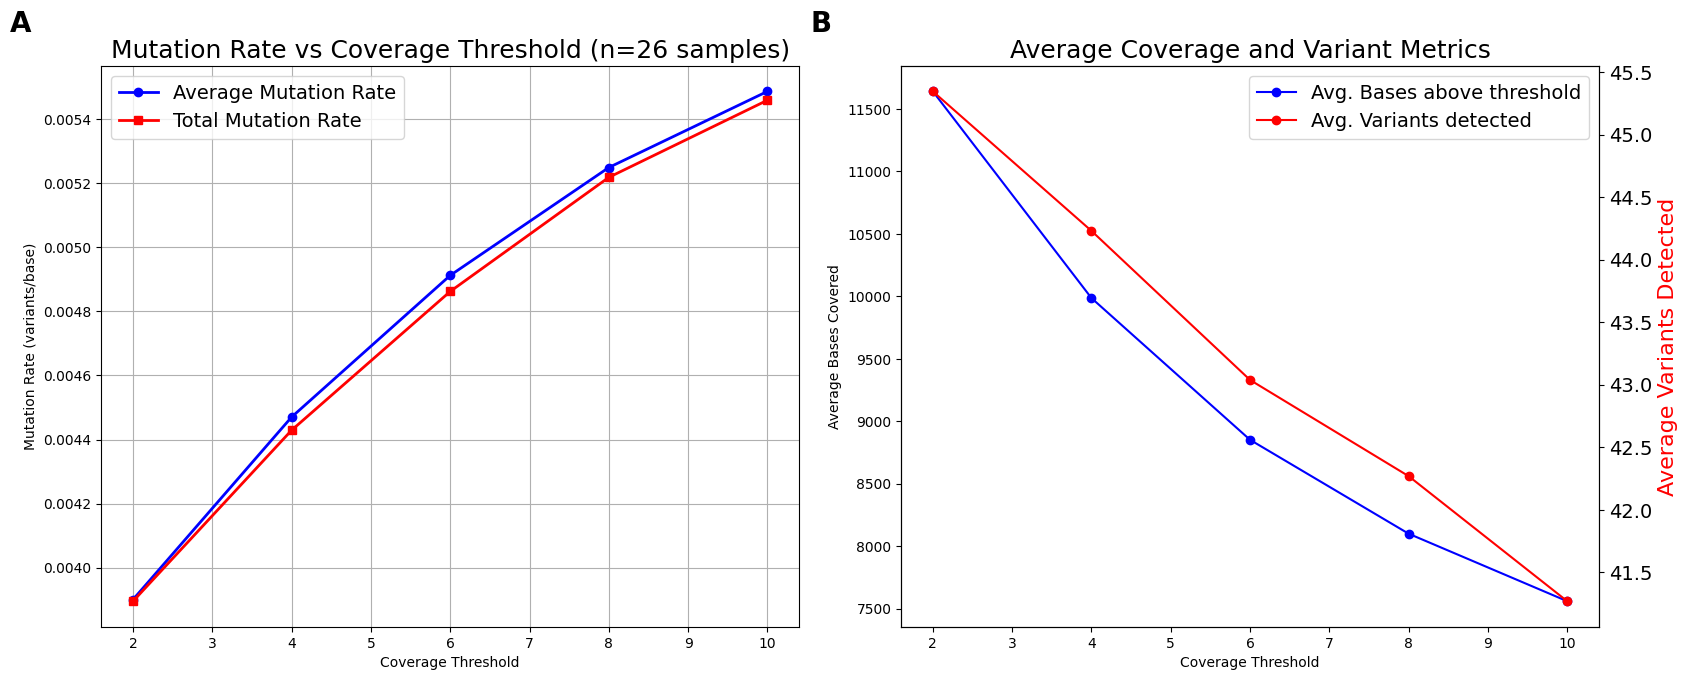

In [8]:
# If you want to combine multiple samples into a single plot with averages and totals
def plot_combined_results(all_results):
    # Create dataframes to hold aggregated data
    avg_df = pd.DataFrame()
    total_df = pd.DataFrame()
    
    # Get the thresholds (assuming all samples have the same thresholds)
    sample_key = list(all_results.keys())[0]
    thresholds = all_results[sample_key]['threshold'].tolist()
    
    # Initialize columns for the average and total calculations
    avg_df['threshold'] = thresholds
    avg_df['mutation_rate'] = 0
    avg_df['bases_covered'] = 0
    avg_df['variants_detected'] = 0
    
    total_df['threshold'] = thresholds
    total_df['bases_covered'] = 0
    total_df['variants_detected'] = 0
    
    # Aggregate data across all samples
    for sample_id, results_df in all_results.items():
        for i, threshold in enumerate(thresholds):
            # For each threshold, add the values from this sample
            total_df.loc[i, 'bases_covered'] += results_df.loc[i, 'bases_covered']
            total_df.loc[i, 'variants_detected'] += results_df.loc[i, 'variants_detected']
            avg_df.loc[i, 'mutation_rate'] += results_df.loc[i, 'mutation_rate']
            avg_df.loc[i, 'bases_covered'] += results_df.loc[i, 'bases_covered']
            avg_df.loc[i, 'variants_detected'] += results_df.loc[i, 'variants_detected']
    
    # Calculate averages
    num_samples = len(all_results)
    avg_df['mutation_rate'] = avg_df['mutation_rate'] / num_samples
    avg_df['bases_covered'] = avg_df['bases_covered'] / num_samples
    avg_df['variants_detected'] = avg_df['variants_detected'] / num_samples
    
    # Calculate the total mutation rate
    total_df['mutation_rate'] = total_df['variants_detected'] / total_df['bases_covered']
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))
    plt.rcParams.update({
    'font.size': 14,  # Base font size increase
    'axes.labelsize': 16,  # Axis labels
    'axes.titlesize': 18,  # Subplot title
    'xtick.labelsize': 14,  # X tick labels
    'ytick.labelsize': 14,  # Y tick labels
    'legend.fontsize': 14,  # Legend text
    'figure.titlesize': 20  # Figure title
    })

    ax1.text(-0.1, 1.10, 'A', transform=ax1.transAxes, 
             fontsize=20, fontweight='bold', va='top', ha='right')
    
    ax2.text(-0.1, 1.10, 'B', transform=ax2.transAxes, 
             fontsize=20, fontweight='bold', va='top', ha='right')
    
    # Plot 1: Mutation Rates
    ax1.plot(avg_df['threshold'], avg_df['mutation_rate'], 'o-', linewidth=2, color='blue', 
             label='Average Mutation Rate')
    ax1.plot(total_df['threshold'], total_df['mutation_rate'], 's-', linewidth=2, color='red', 
             label='Total Mutation Rate')
    ax1.set_xlabel('Coverage Threshold')
    ax1.set_ylabel('Mutation Rate (variants/base)')
    ax1.set_title(f'Mutation Rate vs Coverage Threshold (n=26 samples)')
    ax1.grid(True)
    ax1.legend()
    
    # Plot 2: Bases and Variants
    ax2.set_xlabel('Coverage Threshold')
    ax2.set_ylabel('Average Bases Covered')
    ax2.set_title('Average Coverage and Variant Metrics')
    
    # Plot average number of bases (primary y-axis)
    line1 = ax2.plot(avg_df['threshold'], avg_df['bases_covered'], 'b-o', 
                    label='Avg. Bases above threshold')
    
    # Create secondary y-axis for variants
    ax3 = ax2.twinx()
    line2 = ax3.plot(avg_df['threshold'], avg_df['variants_detected'], 'r-o', 
                    label='Avg. Variants detected')
    ax3.set_ylabel('Average Variants Detected', color='r')
    
    # Combine legends from both axes
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax2.legend(lines, labels, loc='upper right')
    
    plt.tight_layout()
    plt.savefig('ds6_mutation_rate_analysis_until_10.png')
    
    return fig, (avg_df, total_df)

# Modify the execution code
if len(all_results) > 1:
    fig, (avg_results, total_results) = plot_combined_results(all_results)
    
    plt.show()
else:
    # Show the single sample plot
    plt.figure()
    key = list(all_results.keys())[0]
    plot_mutation_rates(all_results[key])
    plt.show()

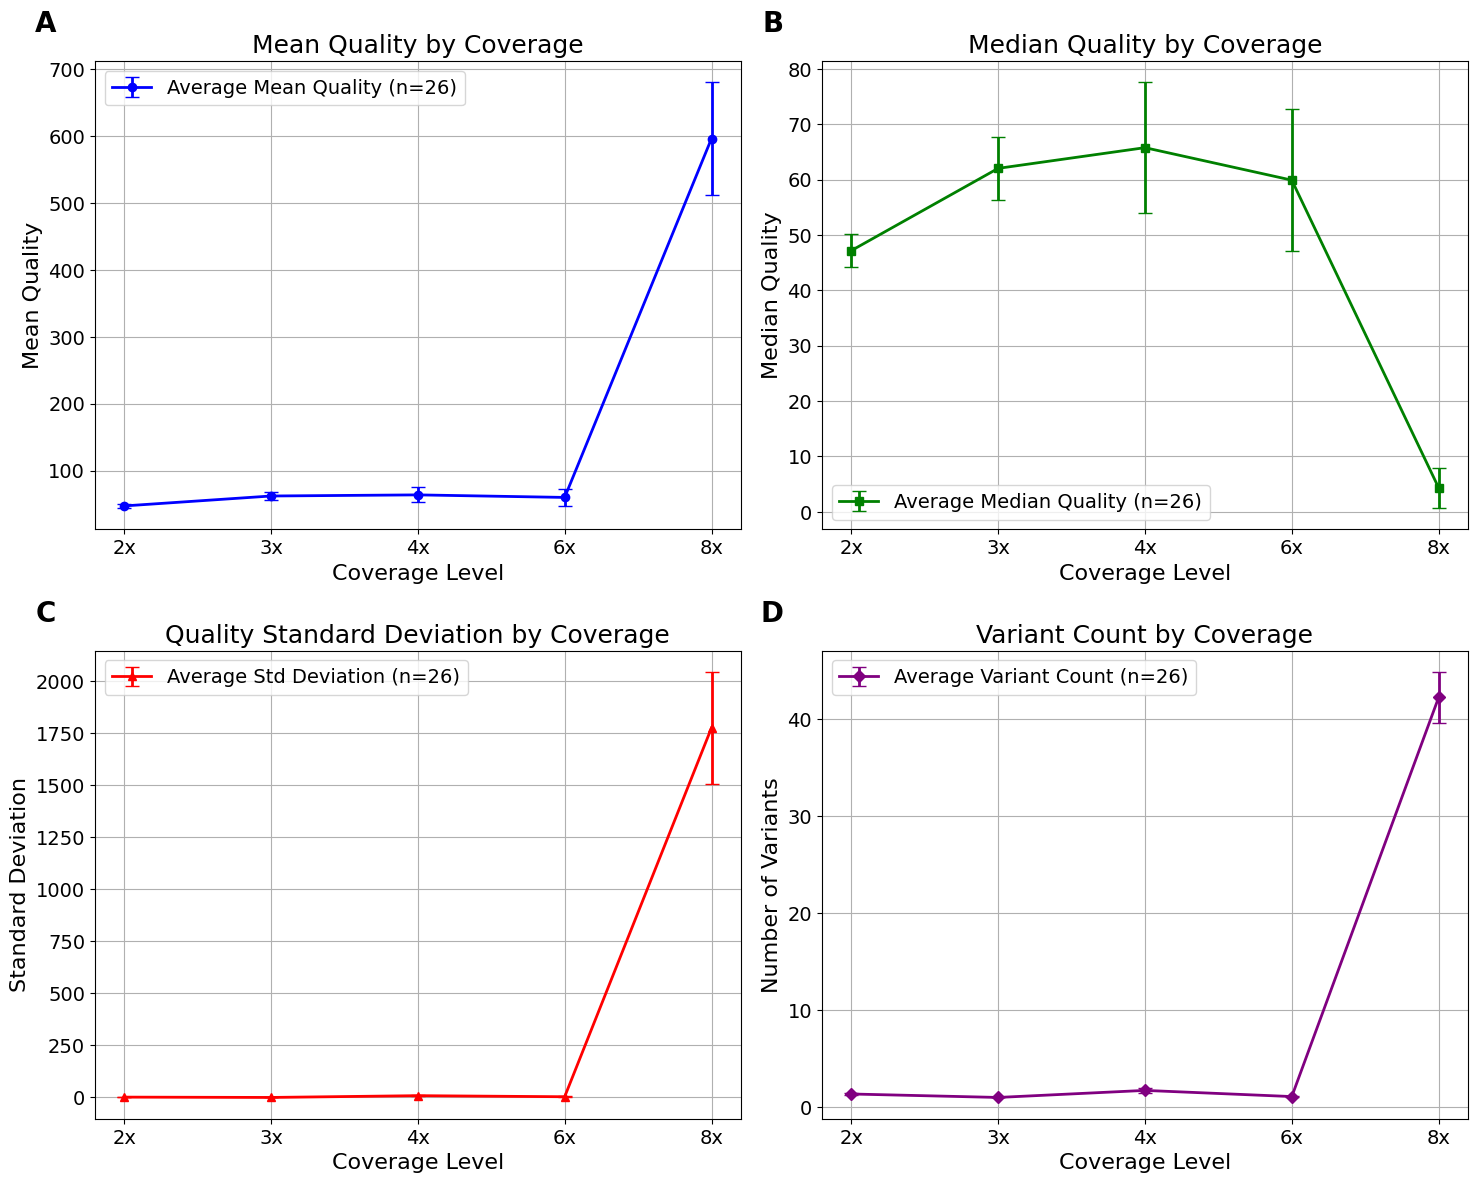

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to plot only averaged quality metrics from all_results
def plot_quality_metrics_average(all_results):
    # Create a figure with multiple subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    plt.rcParams.update({
    'font.size': 14,  # Base font size increase
    'axes.labelsize': 16,  # Axis labels
    'axes.titlesize': 18,  # Subplot title
    'xtick.labelsize': 14,  # X tick labels
    'ytick.labelsize': 14,  # Y tick labels
    'legend.fontsize': 14,  # Legend text
    'figure.titlesize': 20  # Figure title
})
    ax1.text(-0.06, 1.11, 'A', transform=ax1.transAxes, 
             fontsize=20, fontweight='bold', va='top', ha='right')
    
    ax2.text(-0.06, 1.11, 'B', transform=ax2.transAxes, 
             fontsize=20, fontweight='bold', va='top', ha='right')
    # Define coverage groups order for consistent x-axis
    ax3.text(-0.06, 1.11, 'C', transform=ax3.transAxes, 
             fontsize=20, fontweight='bold', va='top', ha='right')
    # Define coverage groups order for consistent x-axis
    ax4.text(-0.06, 1.11, 'D', transform=ax4.transAxes, 
             fontsize=20, fontweight='bold', va='top', ha='right')
    
    
    
    coverage_groups = ["2x", "3x", "4x", "6x", "8x"]
    
    # Prepare data structures for aggregating results
    mean_qualities = {cov: [] for cov in coverage_groups}
    median_qualities = {cov: [] for cov in coverage_groups}
    std_qualities = {cov: [] for cov in coverage_groups}
    variant_counts = {cov: [] for cov in coverage_groups}
    
    # Collect data from all samples (for averaging)
    for sample_id, quality_stats in all_results.items():
        for cov in coverage_groups:
            if cov in quality_stats and quality_stats[cov]:  # Check if this coverage exists for the sample
                mean_qualities[cov].append(quality_stats[cov]['mean_quality'])
                median_qualities[cov].append(quality_stats[cov]['median_quality'])
                std_qualities[cov].append(quality_stats[cov]['std_quality'])
                variant_counts[cov].append(quality_stats[cov]['variant_count'])
    
    # Calculate averages across all samples
    avg_mean_qualities = []
    avg_median_qualities = []
    avg_std_qualities = []
    avg_variant_counts = []
    
    # Also calculate standard error for error bars
    se_mean_qualities = []
    se_median_qualities = []
    se_std_qualities = []
    se_variant_counts = []
    
    for cov in coverage_groups:
        if mean_qualities[cov]:  # Check if we have data for this coverage
            avg_mean_qualities.append(np.mean(mean_qualities[cov]))
            avg_median_qualities.append(np.mean(median_qualities[cov]))
            avg_std_qualities.append(np.mean(std_qualities[cov]))
            avg_variant_counts.append(np.mean(variant_counts[cov]))
            
            # Calculate standard error if we have more than one sample
            if len(mean_qualities[cov]) > 1:
                se_mean_qualities.append(np.std(mean_qualities[cov], ddof=1) / np.sqrt(len(mean_qualities[cov])))
                se_median_qualities.append(np.std(median_qualities[cov], ddof=1) / np.sqrt(len(median_qualities[cov])))
                se_std_qualities.append(np.std(std_qualities[cov], ddof=1) / np.sqrt(len(std_qualities[cov])))
                se_variant_counts.append(np.std(variant_counts[cov], ddof=1) / np.sqrt(len(variant_counts[cov])))
            else:
                se_mean_qualities.append(0)
                se_median_qualities.append(0)
                se_std_qualities.append(0)
                se_variant_counts.append(0)
        else:
            avg_mean_qualities.append(np.nan)
            avg_median_qualities.append(np.nan)
            avg_std_qualities.append(np.nan)
            avg_variant_counts.append(np.nan)
            
            se_mean_qualities.append(np.nan)
            se_median_qualities.append(np.nan)
            se_std_qualities.append(np.nan)
            se_variant_counts.append(np.nan)
    
    # Plot average lines
    ax1.errorbar(coverage_groups, avg_mean_qualities, yerr=se_mean_qualities, 
                 fmt='o-', linewidth=2, color='blue', capsize=5, 
                 label=f'Average Mean Quality (n=26)')
    
    ax2.errorbar(coverage_groups, avg_median_qualities, yerr=se_median_qualities, 
                 fmt='s-', linewidth=2, color='green', capsize=5, 
                 label=f'Average Median Quality (n=26)')
    
    ax3.errorbar(coverage_groups, avg_std_qualities, yerr=se_std_qualities, 
                 fmt='^-', linewidth=2, color='red', capsize=5, 
                 label=f'Average Std Deviation (n=26)')
    
    ax4.errorbar(coverage_groups, avg_variant_counts, yerr=se_variant_counts, 
                 fmt='D-', linewidth=2, color='purple', capsize=5, 
                 label=f'Average Variant Count (n=26)')
    
    # Set titles and labels
    ax1.set_title('Mean Quality by Coverage')
    ax1.set_xlabel('Coverage Level')
    ax1.set_ylabel('Mean Quality')
    ax1.grid(True)
    
    ax2.set_title('Median Quality by Coverage')
    ax2.set_xlabel('Coverage Level')
    ax2.set_ylabel('Median Quality')
    ax2.grid(True)
    
    ax3.set_title('Quality Standard Deviation by Coverage')
    ax3.set_xlabel('Coverage Level')
    ax3.set_ylabel('Standard Deviation')
    ax3.grid(True)
    
    ax4.set_title('Variant Count by Coverage')
    ax4.set_xlabel('Coverage Level')
    ax4.set_ylabel('Number of Variants')
    ax4.grid(True)
    
    # Add legends
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax3.legend(loc='best')
    ax4.legend(loc='best')
    
    plt.tight_layout()
    plt.savefig('ds6_variant_quality_analysis_avg.png', dpi=300)
    
    return fig

# Example usage:
if len(all_results) > 0:
     fig = plot_quality_metrics_average(all_results)
     plt.show()

/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.

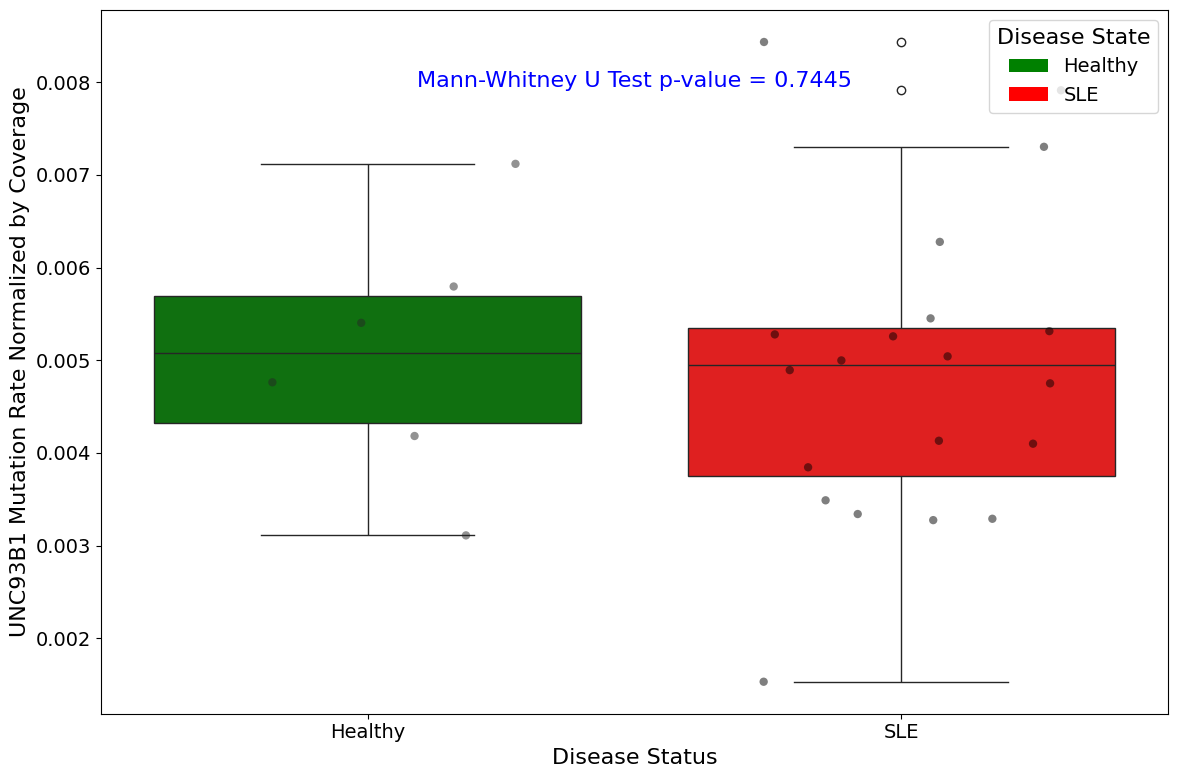

In [23]:
# UNC93B1 Mutation Rate by Disease State

from scipy.stats import mannwhitneyu
from matplotlib.patches import Patch

unc_rate = "unc_rate_>4"
# Assuming 'df' is your original DataFrame
# Group data without aggregating to mean
grouped_ratio_df = df.groupby(['disease'])[unc_rate].apply(list).reset_index()

# Explode lists into individual rows to facilitate plotting
grouped_ratio_df = grouped_ratio_df.explode(unc_rate)

# Convert data back to numeric (explode turns data into object type)
grouped_ratio_df[unc_rate] = pd.to_numeric(grouped_ratio_df[unc_rate])

# Perform Mann-Whitney U test
healthy = grouped_ratio_df[grouped_ratio_df['disease'] == 'Healthy'][unc_rate].dropna()
sle = grouped_ratio_df[grouped_ratio_df['disease'] == 'SLE'][unc_rate].dropna()
stat, p_value = mannwhitneyu(healthy, sle, alternative='two-sided')

# Plotting
# Increase default font sizes
plt.rcParams.update({
    'font.size': 14,  # Base font size increase
    'axes.labelsize': 16,  # Axis labels
    'axes.titlesize': 18,  # Subplot title
    'xtick.labelsize': 14,  # X tick labels
    'ytick.labelsize': 14,  # Y tick labels
    'legend.fontsize': 14,  # Legend text
    'figure.titlesize': 20  # Figure title
})
plt.figure(figsize=(12, 8))

# Create a boxplot
ax = sns.boxplot(data=grouped_ratio_df, x='disease', y=unc_rate, hue='disease', palette=['green', 'red'])

# Overlay data points
# Ensure the 'jitter' is minimal and 'dodge' is set to True for correct alignment
sns.stripplot(data=grouped_ratio_df, x='disease', y=unc_rate, hue='disease', color='black', size=6, jitter=0.3, alpha=0.5,  ax=ax)

# Add p-value annotation to the plot
plt.text(0.5, max(grouped_ratio_df[unc_rate]) * 0.95, f"Mann-Whitney U Test p-value = {p_value:.4g}", 
         ha='center', va='center', fontsize=16, color='blue')

legend_elements = [Patch(facecolor='green', label='Healthy'),
                  Patch(facecolor='red', label='SLE')]
#legend = ax.legend(handles=legend_elements, loc='best')
plt.legend(handles=legend_elements, title='Disease State', loc='upper right', 
           fontsize=14, title_fontsize=16)  # Increased font sizes
plt.xlabel('Disease Status')
plt.ylabel('UNC93B1 Mutation Rate Normalized by Coverage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('ds6_1_UNC93B1_Mutation_Rate_Normalized_by_Coverage.png', dpi=300, bbox_inches='tight')
plt.show()



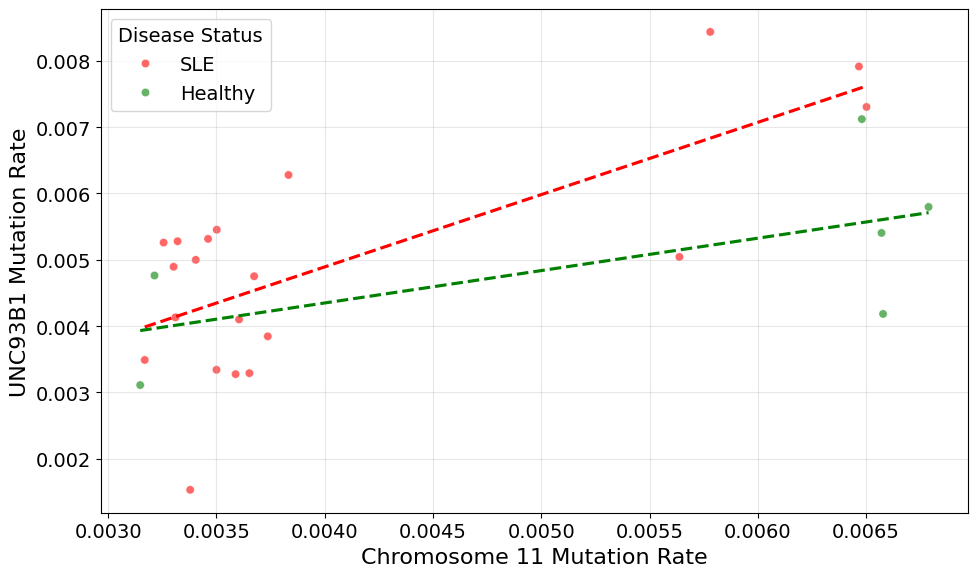

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

unc_rate = "unc_rate_>4"
chr11_rate = "ch11_rate"

# Create plot dataframe
plot_df = df[[unc_rate, chr11_rate, 'disease']].copy()
plot_df = plot_df.dropna()

# Plotting
plt.rcParams.update({
    'font.size': 14,  # Base font size increase
    'axes.labelsize': 16,  # Axis labels
    'axes.titlesize': 18,  # Subplot title
    'xtick.labelsize': 14,  # X tick labels
    'ytick.labelsize': 14,  # Y tick labels
    'legend.fontsize': 14,  # Legend text
    'figure.titlesize': 20  # Figure title
})
plt.figure(figsize=(10, 6))

# Create scatter plot
scatter = sns.scatterplot(
    data=plot_df,
    x=chr11_rate, 
    y=unc_rate, 
    hue='disease',
    palette={'SLE': 'red', 'Healthy': 'green'},
    alpha=0.6
)

# Add regression lines WITHOUT confidence intervals
for status in plot_df['disease'].unique():
    status_data = plot_df[plot_df['disease'] == status]
    sns.regplot(
        data=status_data,
        x=chr11_rate,
        y=unc_rate,
        scatter=False,
        ci=None,  # This removes the confidence interval shading
        color='red' if status == 'SLE' else 'green',
        line_kws={'linestyle': '--'},
        ax=scatter
    )

#plt.title('Comparison of UNC93B1 Mutation Rate vs. Chromosome 11 Mutation Rate by Disease Status')
plt.xlabel('Chromosome 11 Mutation Rate')
plt.ylabel('UNC93B1 Mutation Rate')
plt.legend(title='Disease Status')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('ds6_2_Comparison_of_UNC93B1_Mutation_Rate_Chromosome_11_Mutation_Rate.png', 
            dpi=300, bbox_inches='tight')
plt.show()

/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.

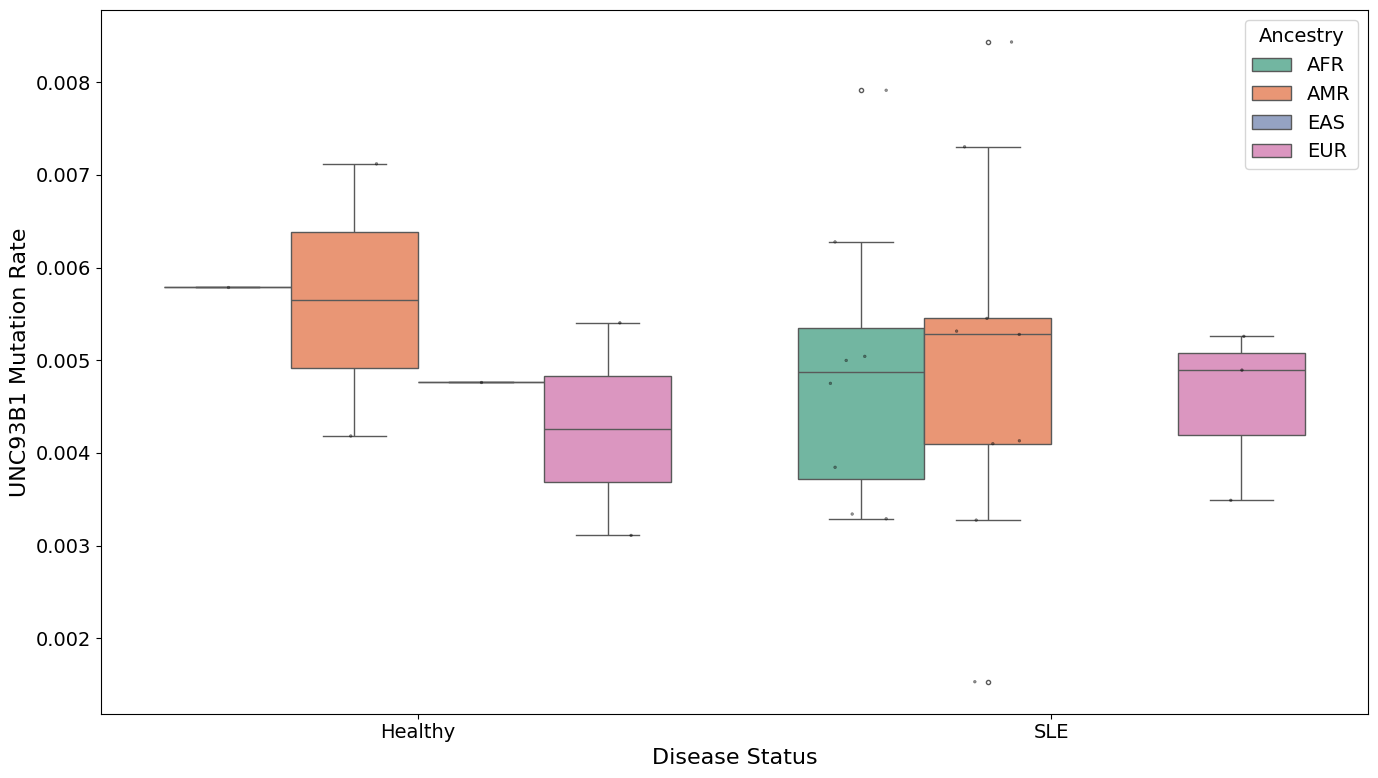

In [25]:
# CHANGE THIS
# UNC Mutation Rate Distribution by Disease Status and Ancestry
# Group and flatten the 'unc_rate' lists into individual rows
unc_rate = "unc_rate_>4"
grouped_ratio_df = df.groupby(['disease', 'predicted_ancestry'])[unc_rate].apply(list).reset_index()
grouped_ratio_df = grouped_ratio_df.explode(unc_rate)
# Convert 'unc_rate' back to numeric after exploding
grouped_ratio_df[unc_rate] = pd.to_numeric(grouped_ratio_df[unc_rate])

plt.rcParams.update({
    'font.size': 14,  # Base font size increase
    'axes.labelsize': 16,  # Axis labels
    'axes.titlesize': 18,  # Subplot title
    'xtick.labelsize': 14,  # X tick labels
    'ytick.labelsize': 14,  # Y tick labels
    'legend.fontsize': 14,  # Legend text
    'figure.titlesize': 20  # Figure title
})

plt.figure(figsize=(14, 8))

# Create the boxplot instead of violin plot
sns.boxplot(
    data=grouped_ratio_df, 
    x='disease', 
    y=unc_rate, 
    hue='predicted_ancestry', 
    dodge=True,
    palette='Set2',  # Use Seaborn's Set2 for clearer colors
    width=0.8,       # Width of the boxes
    fliersize=3      # Size of outlier points
)

# Overlay individual data points for more detail
sns.stripplot(
    data=grouped_ratio_df, 
    x='disease', 
    y=unc_rate, 
    hue='predicted_ancestry', 
    dodge=True, 
    jitter=0.2,      # Adjust jitter to spread points within each category
    color='black', 
    size=2, 
    marker='o', 
    alpha=0.5, 
    edgecolor="gray", 
    linewidth=0.3
)

# Update legend to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:len(set(grouped_ratio_df['predicted_ancestry']))], 
           labels[:len(set(grouped_ratio_df['predicted_ancestry']))], 
           title="Ancestry", 
           loc="upper right")

# Customize labels and title
plt.xlabel('Disease Status')
plt.ylabel('UNC93B1 Mutation Rate')
#plt.title('UNC93B1 Mutation Rate Distribution by Disease Status and Ancestry')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('ds6_3_Ancestry.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_22868/295250010.py:24: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_22868/295250010.py:24: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


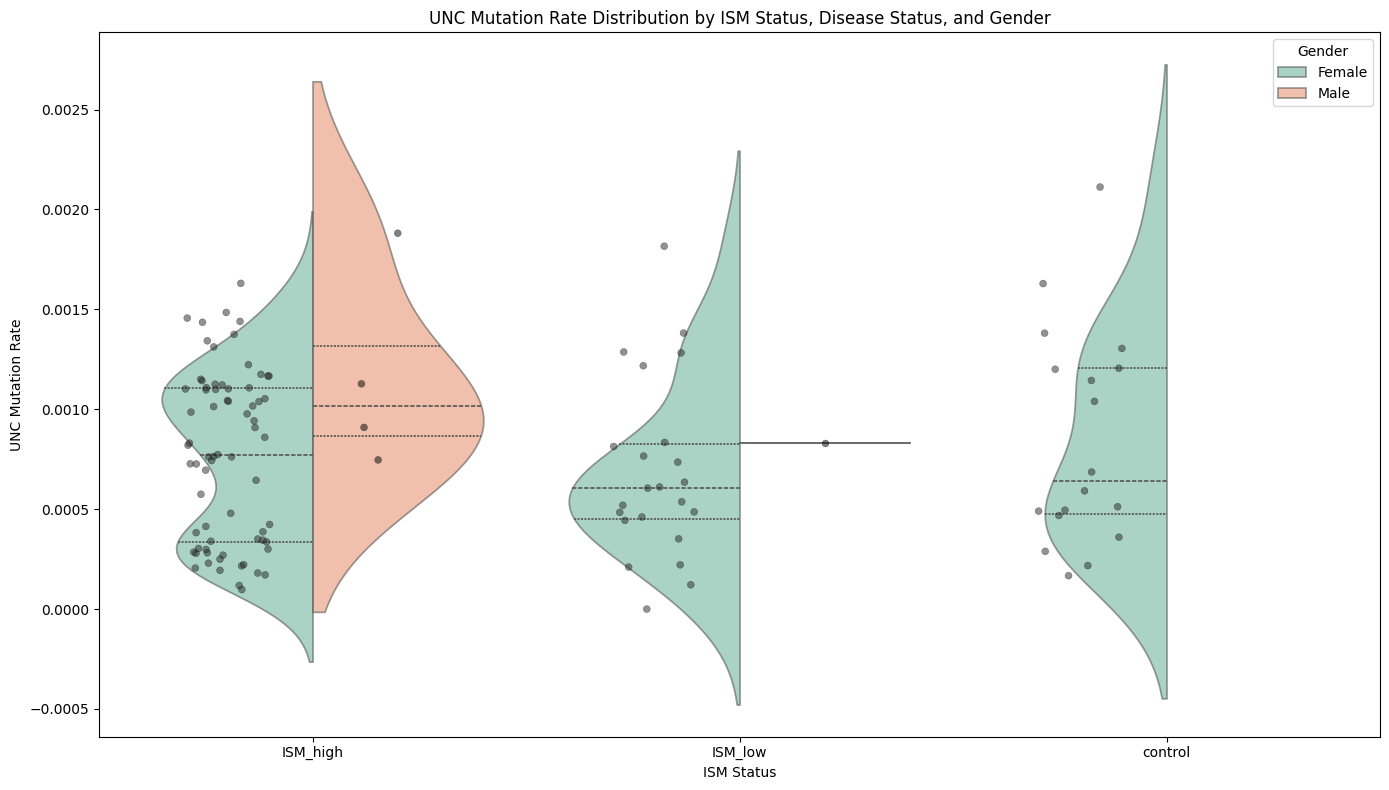

In [42]:
# UNC Mutation Rate Distribution by ISM Status, Disease Status, and Gender
# Gender
grouped_ratio_df = df.groupby(['ism', 'disease_status', 'Gender'])[unc_rate].apply(list).reset_index()
grouped_ratio_df = grouped_ratio_df.explode(unc_rate)

# Convert 'unc_rate' back to numeric after exploding
grouped_ratio_df[unc_rate] = pd.to_numeric(grouped_ratio_df[unc_rate])

plt.figure(figsize=(14, 8))

# Create the violin plot
sns.violinplot(
    data=grouped_ratio_df, 
    x='ism', 
    y=unc_rate, 
    hue='Gender', 
    dodge=True, 
    split=True, 
    inner="quartile",  # Show quartiles for better distribution insight
    palette='Set2',  # Use Seaborn's Set2 for clearer colors
    alpha=0.6  # Adjust transparency to better distinguish overlaps
)

# Overlay individual data points for more detail
sns.stripplot(
    data=grouped_ratio_df, 
    x='ism', 
    y=unc_rate, 
    hue='Gender', 
    dodge=True, 
    jitter=0.2,  # Adjust jitter to spread points within each category
    color='black', 
    size=5, 
    marker='o', 
    alpha=0.5, 
    edgecolor="gray", 
    linewidth=0.3
)

# Update legend to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:len(set(grouped_ratio_df['Gender']))], labels[:len(set(grouped_ratio_df['Gender']))], title="Gender", loc="upper right")

# Customize labels and title
plt.xlabel('ISM Status')
plt.ylabel('UNC Mutation Rate')
plt.title('UNC Mutation Rate Distribution by ISM Status, Disease Status, and Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [6]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Assuming df is already defined and loaded with data.

# Update column values for 'disease_status'
df['disease_status'] = df['disease_status'].replace({
    "systemic lupus erythematosus (SLE)": "SLE"
})

# Function to perform Mann-Whitney U test between healthy and SLE samples and return results
def perform_mannwhitneyu(df):
    # Split data into two groups based on disease_status
    group1 = df[df['disease_status'] == 'healthy']['unc_rate']
    group2 = df[df['disease_status'] == 'SLE']['unc_rate']

    # Perform Mann-Whitney U Test
    if len(group1) > 0 and len(group2) > 0:
        u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
        median_healthy = group1.median()
        median_sle = group2.median()
        return {
            'u_stat': u_stat,
            'p_val': p_val,
            'median_healthy': median_healthy,
            'median_sle': median_sle,
            'difference_direction': 'SLE > healthy' if median_sle > median_healthy else 'healthy > SLE',
            'n_healthy': len(group1),
            'n_sle': len(group2)
        }
    else:
        return {
            'u_stat': None,
            'p_val': None,
            'median_healthy': None,
            'median_sle': None,
            'difference_direction': None,
            'n_healthy': len(group1),
            'n_sle': len(group2)
        }

# Call the function to perform the test
result = perform_mannwhitneyu(df)

# Print or view the result
print(result)


{'u_stat': 964.0, 'p_val': 0.583905676373893, 'median_healthy': 0.06387935162863938, 'median_sle': 0.07616146230007616, 'difference_direction': 'SLE > healthy', 'n_healthy': 18, 'n_sle': 99}


In [7]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Update column values for 'disease_status'
df['disease_status'] = df['disease_status'].replace({
    "systemic lupus erythematosus (SLE)": "SLE"
})

# Function to perform Mann-Whitney U test between healthy and SLE samples and return results
def perform_mannwhitneyu(df):
    # Split data into two groups based on disease_status
    group1 = df[df['ism'] == 'ISM_low']['unc_rate']
    group2 = df[df['ism'] == 'ISM_high']['unc_rate']

    # Perform Mann-Whitney U Test
    if len(group1) > 0 and len(group2) > 0:
        u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
        median_low = group1.median()
        median_high = group2.median()
        return {
            'u_stat': u_stat,
            'p_val': p_val,
            'median_healthy': median_low,
            'median_sle': median_high,
            'difference_direction': 'ISM high > ISM low' if median_high > median_low else 'healthy > SLE',
            'n_healthy': len(group1),
            'n_sle': len(group2)
        }
    else:
        return {
            'u_stat': None,
            'p_val': None,
            'median_healthy': None,
            'median_sle': None,
            'difference_direction': None,
            'n_healthy': len(group1),
            'n_sle': len(group2)
        }

# Call the function to perform the test
result = perform_mannwhitneyu(df)

# Print or view the result
print(result)


{'u_stat': 792.0, 'p_val': 0.38008818402165645, 'median_healthy': 0.06079628674631709, 'median_sle': 0.08200455580865604, 'difference_direction': 'ISM high > ISM low', 'n_healthy': 24, 'n_sle': 75}
